In [1]:
import os
import numpy as np
from dataclasses import dataclass, fields
from VASP_job.code.main import VASP_job

import pandas as pd
import ase
from ase.spacegroup import crystal

from pyiron.atomistics.structure.atoms import ase_to_pyiron
from pyiron.atomistics.structure.atoms import pyiron_to_ase

import matplotlib.pyplot as plt


# Define a custom formatting function for vectors in pandas
format_vector = lambda vector: '[' + ', '.join(['{:.10f}'.format(x) for x in vector]) + ']'

In [2]:
a = 3.95
alpha = 90
structure = crystal(('Ga', 'Mn', 'N'),
                       basis=[(0.00, 0.00, 0.00), (0.00, 0.50, 0.50), (0.50, 0.50, 0.50)],
                       spacegroup=221,
                       cellpar=[a, a, a, alpha, alpha, alpha])
structure.symbols.species()

{'Ga', 'Mn', 'N'}

In [3]:
# Create a defition that does all this?

executable_path= "/home/emendive/workbench/work/from_claix/codes/VASP/vasp.5.4.4-flag4/bin"
potential_path = "/home/emendive/workbench/work/from_claix/codes/VASP/potentials/potpaw_PBE"
vasp = VASP_job(verbose="low", executable_path=executable_path, potential_path=potential_path)

In [4]:
number_of_atoms = len(structure)
vasp.io.magnetic_inputs.magdirs   = []
vasp.io.magnetic_inputs.ms    = []
vasp.io.magnetic_inputs.B_CONSTRs = []
for i in range(number_of_atoms):
   if 'Mn' == structure.get_chemical_symbols()[i]:
      vasp.io.magnetic_inputs.magdirs.append([0.0, 0.0, 1.0])
      vasp.io.magnetic_inputs.ms.append(0.995)
      vasp.io.magnetic_inputs.B_CONSTRs.append([0.0, 0.0, 0.0])
   else:
      vasp.io.magnetic_inputs.magdirs.append([-2.0, 1.0, 0.0])
      vasp.io.magnetic_inputs.ms.append(0.995)
      vasp.io.magnetic_inputs.B_CONSTRs.append([0.0, 0.0, 0.0])

In [14]:
vasp.io.constr_INCAR_parameters.I_CONSTRAINED = "4"
vasp.structure.kpoints = "2 2 2"
vasp.df = [structure, vasp.io.magnetic_inputs]
pd.options.display.float_format = '{:.2e}'.format
df_magmoms = vasp.df["magmoms"].apply(format_vector)
print(vasp.df)
df_magmoms

  elements              positions           magdirs       ms   betahs  \
0       Ga        [0.0, 0.0, 0.0]  [-2.0, 1.0, 0.0] 9.95e-01 2.00e+02   
1       Mn    [0.0, 1.975, 1.975]   [0.0, 0.0, 1.0] 9.95e-01 2.00e+02   
2       Mn    [1.975, 0.0, 1.975]   [0.0, 0.0, 1.0] 9.95e-01 2.00e+02   
3       Mn    [1.975, 1.975, 0.0]   [0.0, 0.0, 1.0] 9.95e-01 2.00e+02   
4        N  [1.975, 1.975, 1.975]  [-2.0, 1.0, 0.0] 9.95e-01 2.00e+02   

                                             magmoms        B_CONSTRs  
0  [-1.8555987836155436, 1.2188894744257874, -0.2...  [0.0, 0.0, 0.0]  
1  [-0.016401613661456732, -0.10841191652516453, ...  [0.0, 0.0, 0.0]  
2  [0.01454458121173599, -0.03927200555239464, 0....  [0.0, 0.0, 0.0]  
3  [0.00886380724439388, -0.0760400046954497, 0.9...  [0.0, 0.0, 0.0]  
4  [-2.003454686095563, 0.9922014875233014, -0.04...  [0.0, 0.0, 0.0]  


0    [-1.8555987836, 1.2188894744, -0.2665738235]
1    [-0.0164016137, -0.1084119165, 0.9939707458]
2     [0.0145445812, -0.0392720056, 0.9991226975]
3     [0.0088638072, -0.0760400047, 0.9970653693]
4    [-2.0034546861, 0.9922014875, -0.0412980498]
Name: magmoms, dtype: object

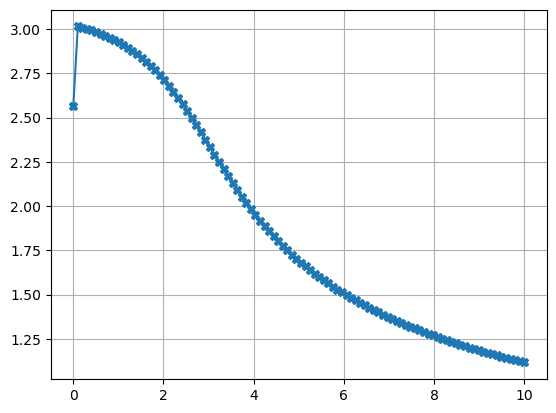

In [15]:
random_number = np.random.random()
random_number = 0.9963636835363322
betahs = np.linspace(0, 10, 100)
thetas = []
for betah in betahs:
   thetas.append( vasp.magnetism.get_theta_mag(random_number, betah) )
plt.plot(betahs, thetas, '-X')
plt.grid(visible=True)

In [10]:
a=0.0
if a is False:
   print("h")

In [7]:
vasp.io.magnetic_inputs.betahs

[0.0, 0.0, 0.0, 0.0, 0.0]

In [9]:
vasp.io.cwd = "asf"
vasp.io.INCAR_file

'asf/INCAR'

In [5]:
vasp.prepare_calculation()

In [6]:
vasp.structure.species

['Ga', 'N', 'Mn']

In [7]:
vasp.magnetism.betahs

[0.0, 1.0, 1.0, 1.0, 0.0]

In [8]:
structure.set_initial_magnetic_moments([[0, 0, 2], [0, 0, 0], [0, 0, 2], [0, 0, 2], [0, 0, 2]])

ValueError: magmons can be collinear or non-collinear.

In [9]:
structure = ase_to_pyiron(structure)
Nrepeat=2
structure.set_repeat([Nrepeat,Nrepeat,Nrepeat])

In [ ]:
ase.build.make_supercell(structure, )

In [26]:
structure.get_initial_magnetic_moments()

array([[0., 0., 2.],
       [0., 0., 0.],
       [0., 0., 2.],
       [0., 0., 2.],
       [0., 0., 2.]])

In [3]:
list( structure.symbols.species() )

['Mn', 'Ni', 'Ga']

In [4]:
structure.get_chemical_symbols()

['Ga', 'Mn', 'Mn', 'Mn', 'Ni']

In [5]:
structure.get_chemical_symbols().count("Mn")

3

In [6]:
structure.cell.array

array([[3.95, 0.  , 0.  ],
       [0.  , 3.95, 0.  ],
       [0.  , 0.  , 3.95]])

In [7]:
list( structure.positions )

[array([0., 0., 0.]),
 array([0.   , 1.975, 1.975]),
 array([1.975, 0.   , 1.975]),
 array([1.975, 1.975, 0.   ]),
 array([1.975, 1.975, 1.975])]

In [8]:
structure.positions

array([[0.   , 0.   , 0.   ],
       [0.   , 1.975, 1.975],
       [1.975, 0.   , 1.975],
       [1.975, 1.975, 0.   ],
       [1.975, 1.975, 1.975]])

Inputs

- positions
- magmoms
- element
- betah

In [9]:
lattice = pd.DataFrame({
   "avec"  : structure.cell[0],
   "bvec"  : structure.cell[1],
   "cvec"  : structure.cell[2]
})
lattice

,avec,bvec,cvec
0,3.95,0.00,0.00
1,0.00,3.95,0.00
2,0.00,0.00,3.95


In [28]:
atoms = pd.DataFrame({
   "elements"  : structure.get_chemical_symbols(),
   "positions" : list( structure.positions ),
   "magmoms"   : list( structure.get_initial_magnetic_moments() ),
   "betahs"    : [1.0, False, 1.0, 0.3, 0.2],
   "B_CONSTRs" : [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 1]]
})
atoms = atoms.sort_values("elements")
atoms

,elements,positions,magmoms,betahs,B_CONSTRs
0,Ga,"[0.0, 0.0, 0.0]","[0.0, 0.0, 2.0]",1.0,"[0, 0, 0]"
1,Mn,"[0.0, 1.975, 1.975]","[0.0, 0.0, 0.0]",False,"[0, 0, 0]"
2,Mn,"[1.975, 0.0, 1.975]","[0.0, 0.0, 2.0]",1.0,"[0, 0, 0]"
3,Mn,"[1.975, 1.975, 0.0]","[0.0, 0.0, 2.0]",0.3,"[0, 0, 0]"
4,Ni,"[1.975, 1.975, 1.975]","[0.0, 0.0, 2.0]",0.2,"[0, 0, 1]"


In [11]:
elements = atoms["elements"].tolist()
elements_red = list(dict.fromkeys(elements))
print(elements)
print(elements_red)

['Ga', 'Mn', 'Mn', 'Mn', 'Ni']
['Ga', 'Mn', 'Ni']


In [12]:
executable_path= "/home/emendive/workbench/work/from_claix/codes/VASP/vasp.5.4.4-flag4/bin"
potential_path = "/home/emendive/workbench/work/from_claix/codes/VASP/potentials/potpaw_PBE"
vasp = VASP_job(verbose="low", executable_path=executable_path, potential_path=potential_path)

vasp.io.constr_INCAR_parameters.I_CONSTRAINED = "5"
vasp.structure.kpoints = "2 2 2"
vasp.prepare_calculation(atoms, structure)

In [13]:
vasp.io.cwd = '/home/emendive/workbench/devel/gitclones/VASP_job/'
vasp.io.cwd

'/home/emendive/workbench/devel/gitclones/VASP_job/'

In [14]:
vasp.io.constr_INCAR_parameters.I_CONSTRAINED = "5"
vasp.structure.kpoints = "2 2 2"
vasp.prepare_calculation(atoms, structure)

In [15]:
vasp.structure.elements

['Ga', 'Mn', 'Mn', 'Mn', 'Ni']

In [16]:
vasp.structure.species

['Mn', 'Ni', 'Ga']

In [9]:
vasp.structure.elements.count("Mn")

2

In [13]:
vasp.io.constr_INCAR_parameters.I_CONSTRAINED

'5'

In [14]:
vasp.magnetism.B_CONSTRs

[[0, 0, 0], [0, 0, 0], [0, 0, 0]]

In [17]:
vasp.io.cwd

'/home/emendive/workbench/devel/gitclones/VASP_job/test/'

In [18]:
vasp.io.standard_INCAR_parameters

standard_INCAR_parameters(SYSTEM='my material #jobname', PREC='Accurate', ALGO='Fast', NPAR='8', LREAL='.FALSE.', LWAVE='.FALSE.', LCHARG='.TRUE.', LORBIT='10', ISMEAR='1', SIGMA='0.03', ISTART='0', ICHARG='2', ISPIN='2', ENCUT='500', EDIFF='1e-6', NELM='200', LMAXMIX='6', LNONCOLLINEAR='.TRUE.')

In [19]:
vasp.structure.kpoints = "1 1 1"
vasp.structure.kpoints

'1 1 1'

In [21]:
vasp.structure.elements = ["Ni"]
vasp.io.potential_files.Ni = "Ni"

In [6]:
class A(object):
    def __init__(self, val):
        self.idx = val

    @property    
    def idx(self):
        return self._idx

    @idx.setter
    def idx(self, val):
        try:
            value1, value2 = val
        except ValueError:
            raise ValueError("Pass an iterable with two items")
        else:
            """ This will run only if no exception was raised """
            self._idx = value1+value2

In [7]:
my_A = A([1,2])
my_A.idx
my_A.idx = [1,3]
my_A.idx

4